# 2.  Generate 50 points (X,Y) according to (1)



empirical correlation  = 1.3137087751133587


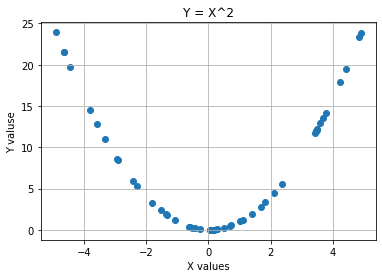

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def dataGeneration(num_of_points, print_flag = True):
  '''
  Generate "num_of_points" sample  of Y = X^2

  input:  - num_of_points: numper of samples
          - print_flag:  can be True of False, if True thr function will print 
            the samples
  output: - X: uniformly distributed samples over [-5, 5]
          - Y: Y = X^2
          - cov: empirical correlation 
  '''
  # Generate X & Y 
  N = num_of_points
  X = np.random.uniform(-5, 5, N)
  X = X.reshape(-1,1)
  Y = X**2
  # Calculate population correlation a.k.a covariance 
  cov = np.mean((X-np.mean(X))*(Y-np.mean(Y)))
  # Print
  if print_flag:
    print("empirical correlation  = {}".format(cov))
    plt.figure()
    plt.scatter(X,Y)
    plt.grid()
    plt.title('Y = X^2')
    plt.xlabel('X values')
    plt.ylabel('Y valuse')
  return X, Y, cov


N = 50
X, Y, cov = dataGeneration(num_of_points = N)

# 3.  Compute the regression line 

[[7.40018923]
 [0.17785043]]


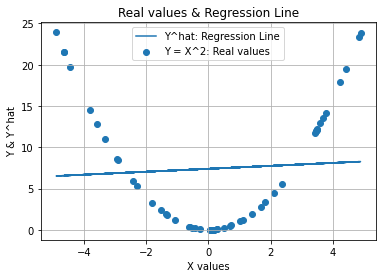

In [24]:
def calcRegressionLine(x,y,num_of_points, print_flag = True):
  '''
  Compute Regression line from samples: y = f(x)
  
  input:  - x: sample
          - y: f(x)
          - num_of_points: number of samples 
          - print_flag: can be True of False, if True thr function will print 
            the regression line
  output: - Y_hat: the regression line of Y according to samples X
  '''
  # Create X matrix in shape [N,2]:
  # first colum contains only 1, secound colum contains X 
  temp = np.ones(N).reshape(N,1)
  X_mat = np.concatenate([temp,X],axis=1)

  # Calculate beta hat
  # beta_inv_part = (X.T*X)^(-1)  
  # bata_hat = beta_inv_part * X_mat.T * Y
  # (where * is matrix multiplication)
  beta_inv_part = np.linalg.inv(np.matmul(X_mat.T,X_mat))
  beta_hat = np.matmul(beta_inv_part, np.matmul(X_mat.T, Y))
  print(beta_hat)
  # Compute Y_hat - the Regression line
  Y_hat = np.matmul(X_mat,beta_hat)

  if print_flag:
    # Plot
    plt.figure()
    plt.scatter(X,Y)
    plt.plot(X,Y_hat)
    plt.grid()
    plt.title('Real values & Regression Line')
    plt.xlabel('X values')
    plt.ylabel('Y & Y^hat')
    plt.legend(['Y^hat: Regression Line', 'Y = X^2: Real values'])
  return Y_hat


Y_hat = calcRegressionLine(X,Y,N)


The statistic(s) reconciles “contradiction” between (1) and (2)

<class 'list'>


Text(0, 0.5, 'Covarience')

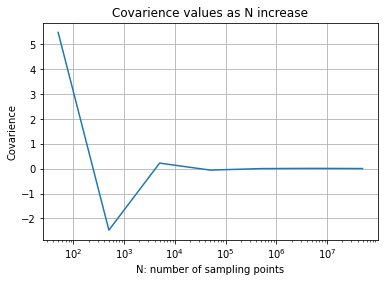

In [25]:
# Calculate the empirical correlation for different values of N
cov_list = list([])
print(type(cov_list))
N_list = [5e1, 5e2, 5e3, 5e4, 5e5, 5e6, 5e7]
for n in N_list:
  _, _, cov = dataGeneration(num_of_points = int(n), print_flag = False)
  cov_list.append(cov)

# Plot
plt.figure()
plt.semilogx(N_list, cov_list)
plt.grid()
plt.title('Covarience values as N increase')
plt.xlabel('N: number of sampling points')
plt.ylabel('Covarience')